####Tarea 4 Punto 4ayb: Simulación estocástica con algoritmo de Gillespie retroalimentación negativa 

a) Cambie su simulación para incluir retroalimentación negativa (correspondiente a 𝑟̇=𝑘𝑟1+(𝑝𝐾)2−𝛾𝑟𝑟 y 𝑝̇=𝑘𝑝𝑟−𝛾𝑝𝑝 ) y repita el punto 3b).

b) De las graficas del promedio de proteína en función del tiempo puede leer directamente el tiempo de respuesta (ver tarea 2.3). ¿Cómo cambia el tiempo de respuesta entre el caso con y sin retroalimentación?


In [1]:
%pylab inline
import time

Yr=1.0/5.0
Yp=1.0/30.0
Kr=1.0
Kp=10.0
K=100

tmax=1000000
numcell=100
tiempofinal=999999999

proteinas=zeros((numcell,tmax))
ARN=zeros((numcell,tmax))
ttotal=zeros((numcell,tmax))

Populating the interactive namespace from numpy and matplotlib


In [2]:
to=time.clock()
for i in range (0,numcell):
    p=zeros(tmax)
    r=zeros(tmax)
    t=0.0
    j=0
    while t<tmax/1000:
        
        rnd=random.random()  
        rj=r[j]
        pj=p[j]   
        Ktotal = (Kp*rj)+Kr/(1+(pj*pj)/(K*K))+(Yp*pj)+(Yr*rj)
        Krnorm = (Kr/(1+(pj*pj)/(K*K)))/Ktotal
        Kpnorm = Kp*rj/Ktotal
        Ypnorm = Yp*pj/Ktotal
        Yrnorm = Yr*rj/Ktotal
        if(rnd<Krnorm):
            r[j+1]=rj+1.0
            p[j+1]=(pj)      
        elif(rnd>=Krnorm)&(rnd<Kpnorm+Krnorm)&(rj!=0): 
            r[j+1]=rj
            p[j+1]=pj+1.0
        elif(rnd>=Kpnorm+Krnorm)&(rnd<Kpnorm+Krnorm+Ypnorm)&(pj!=0):
            r[j+1]=rj
            p[j+1]=pj-1.0 
        elif(rnd>=Kpnorm+Krnorm+Ypnorm)&(rj!=0):
            r[j+1]=rj-1.0
            p[j+1]=pj     
        a=random.exponential(1.0/Ktotal)
        t+=a
        ttotal[i][j+1]=t
        j+=1
    if(tiempofinal>j):
        tiempofinal=j
    if (i%10==0):
        print("Número de células simuladas:",i+10)
    proteinas[i]=p
    ARN[i]=r
tiempo100=(time.clock()-to)
print("El tiempo de la simulación de 100 células es:",int(tiempo100),"segundos")

Número de células simuladas: 10
Número de células simuladas: 20
Número de células simuladas: 30
Número de células simuladas: 40
Número de células simuladas: 50
Número de células simuladas: 60
Número de células simuladas: 70
Número de células simuladas: 80
Número de células simuladas: 90
Número de células simuladas: 100
El tiempo de la simulación de 100 células es: 9 segundos


In [3]:
pfinal=zeros((numcell,int(tiempofinal)))
rfinal=zeros((numcell,int(tiempofinal)))
ttotalfinal=zeros((numcell,int(tiempofinal)))
for i in range (0,numcell):
    pfinal[i]=(proteinas[i])[0:int(tiempofinal)]
    rfinal[i]=(ARN[i])[0:int(tiempofinal)]
    ttotalfinal[i]=(ttotal[i])[0:int(tiempofinal)]
    if(i%10==0):
        print("Número de células simuladas:",i+10)

Número de células simuladas: 10
Número de células simuladas: 20
Número de células simuladas: 30
Número de células simuladas: 40
Número de células simuladas: 50
Número de células simuladas: 60
Número de células simuladas: 70
Número de células simuladas: 80
Número de células simuladas: 90
Número de células simuladas: 100


In [4]:
p=zeros((numcell,int(tiempofinal/100)))
r=zeros((numcell,int(tiempofinal/100)))
for i in range (0,numcell):
    for j in range (0, int(tiempofinal/100)):
        indice = (abs(ttotalfinal[i]-j)).argmin()
        p[i][j]=pfinal[i][indice]
        r[i][j]=rfinal[i][indice]
    if(i%10==0):
        print("Número de células simuladas:",i+10)

Número de células simuladas: 10
Número de células simuladas: 20
Número de células simuladas: 30
Número de células simuladas: 40
Número de células simuladas: 50
Número de células simuladas: 60
Número de células simuladas: 70
Número de células simuladas: 80
Número de células simuladas: 90
Número de células simuladas: 100


In [5]:
Rmean=0
Pmean=0
for i in range(0, len(p)):
    Rmean += r[i]
    Pmean += p[i]
Rmean/=len(r)
Pmean/=len(p)

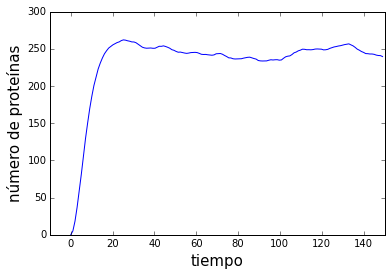

In [6]:
t=linspace(0,len(Pmean),len(Pmean))
plot(t,Pmean) 
ylim(0,300)
xlim(-10,150)
ylabel('número de proteínas',size=15)
xlabel('tiempo',size=15)

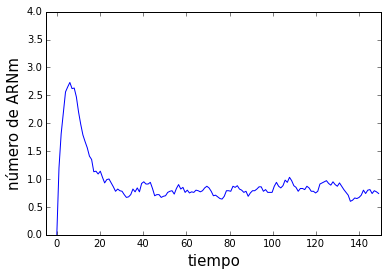

In [7]:
t=linspace(0,len(Rmean),len(Rmean))
plot(t,Rmean)
ylim(0,4)
xlim(-5,150)
ylabel('número de ARNm ',size=15)
xlabel('tiempo',size=15)

####La retroalimentación negativa produce un retraso en el tiempo de respuesta comparado con el caso que no tenemos retroalimentación.

In [8]:
c=len(p[0])-1
DR=empty(0)
DP=empty(0)
for i in range(0,numcell):
    DP=append(DP,[p[i][c]])
    DR=append(DR,[r[i][c]])

El ruido es: 0.294856112603
El promedio es: 239.56


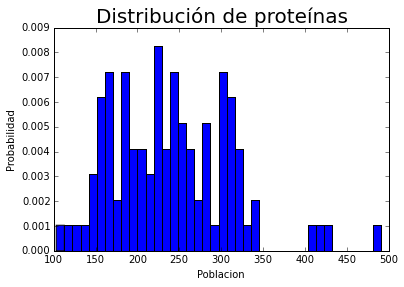

In [9]:
fig=count, bins, ignored = plt.hist(DP,40,normed=True)

title("Distribución de proteínas",size=20)
ylabel('Probabilidad')
xlabel('Poblacion')
plt.savefig('Distribucion de proteinas.pdf',dpi=250)
devesta= std(DP)
meanp= mean(DP)
ruido=(devesta)/meanp
print("El ruido es:",ruido)
print("El promedio es:",meanp)

El ruido es: 0.967325955036
El promedio es: 0.74


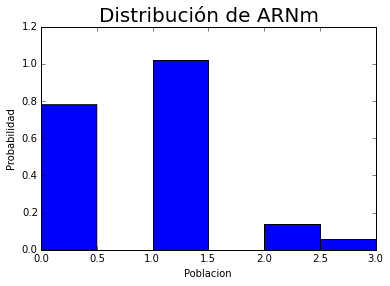

In [10]:
fig=count, bins, ignored = plt.hist(DR,6,normed=True)

title("Distribución de ARNm",size=20)
ylabel('Probabilidad')
xlabel('Poblacion')
devesta= std(DR)
meanp= mean(DR)
ruido=(devesta)/meanp
print("El ruido es:",ruido)
print("El promedio es:",meanp)